<!--BOOK_INFORMATION-->
<a href="https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv" target="_blank"><img align="left" src="data/cover.jpg" style="width: 76px; height: 100px; background: white; padding: 1px; border: 1px solid black; margin-right:10px;"></a>
*This notebook contains an excerpt from the book [Machine Learning for OpenCV](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv) by Michael Beyeler.
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please consider supporting the work by
[buying the book](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv)!*

<!--NAVIGATION-->
< [Using Decision Trees to Diagnose Breast Cancer](05.02-Using-Decision-Trees-to-Diagnose-Breast-Cancer.ipynb) | [Contents](../README.md) | [Detecting Pedestrians with Support Vector Machines](06.00-Detecting-Pedestrians-with-Support-Vector-Machines.ipynb) >

# Using Decision Trees for Regression

Although we have so far focused on using decision trees in classification tasks, you can also use them for regression. But, you will need to use Scikit-Learn again, as OpenCV does not provide this flexibility. We therefore only briefly review its functionality here.

Let's say we wanted to use a decision tree to fit a sine wave. To make things interesting, we will also add some noise to the data points using NumPy's random number generator:

In [1]:
import numpy as np
rng = np.random.RandomState(42)

We then create 100 x values between 0 and 5, and calculate the corresponding sine values:

In [2]:
X = np.sort(5 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()

We then add noise to every other data point in y (using y[::2]), scaled by 0.5 so we don't introduce to much jitter:

In [3]:
y[::2] += 0.5 * (0.5 - rng.rand(50))

You can then create regression tree like any other tree before. We will build two trees, one with a depth of 2, and one with a depth of 5:

In [4]:
from sklearn import tree

In [5]:
regr1 = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
regr1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [6]:
regr2 = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
regr2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

We can then use the decision tree like a linear regressor from Chapter 3, First Steps in Supervised Learning. For this we create a test set with x values densely sampled in the whole range from 0 through 5:

In [7]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

The predicted y values can then be obtained with the predict method:

In [8]:
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

If we plot all of these together, we can see how the decision trees differ:

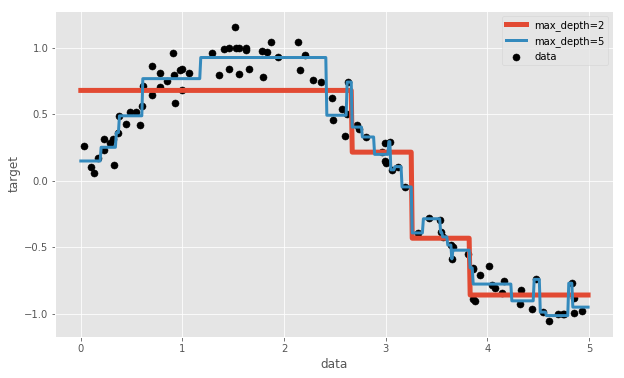

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='k', s=50, label='data')
plt.plot(X_test, y_1, label="max_depth=2", linewidth=5)
plt.plot(X_test, y_2, label="max_depth=5", linewidth=3)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()

<!--NAVIGATION-->
< [Using Decision Trees to Diagnose Breast Cancer](05.02-Using-Decision-Trees-to-Diagnose-Breast-Cancer.ipynb) | [Contents](../README.md) | [Detecting Pedestrians with Support Vector Machines](06.00-Detecting-Pedestrians-with-Support-Vector-Machines.ipynb) >